In [1]:
import numpy as np
import matplotlib.pyplot as plt

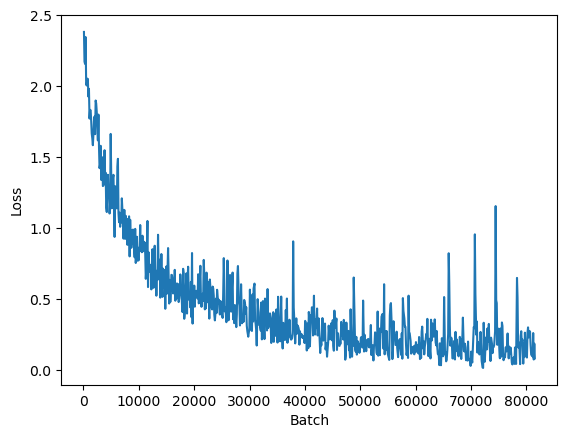

In [53]:
# open csv file
loss_19072023_163205 = np.genfromtxt("WISTAR_19072023-163205.csv", delimiter=",")
loss_22082023_124009 = np.genfromtxt("WISTAR_22082023-124009.csv", delimiter=",")
loss_22082023_130721 = np.genfromtxt("WISTAR_22082023-130721.csv", delimiter=",")

# concatenate batch arrays (second column)
# add last batch of first run to all batches of second run
batch = np.concatenate((loss_19072023_163205[:, 1], loss_22082023_124009[:, 1] + loss_19072023_163205[-1, 1]))
# add last batch of first and second run to all batches of third run
batch = np.concatenate((batch, loss_22082023_130721[:, 1] + loss_19072023_163205[-1, 1] + loss_22082023_124009[-1, 1]))

# concatenate loss arrays (third column)
loss = np.concatenate((loss_19072023_163205[:, 2], loss_22082023_124009[:, 2], loss_22082023_130721[:, 2]))

# reomve nan values
loss = loss[~np.isnan(loss)]
batch = batch[~np.isnan(batch)]


# plot loss
plt.plot(batch, loss)
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.show()

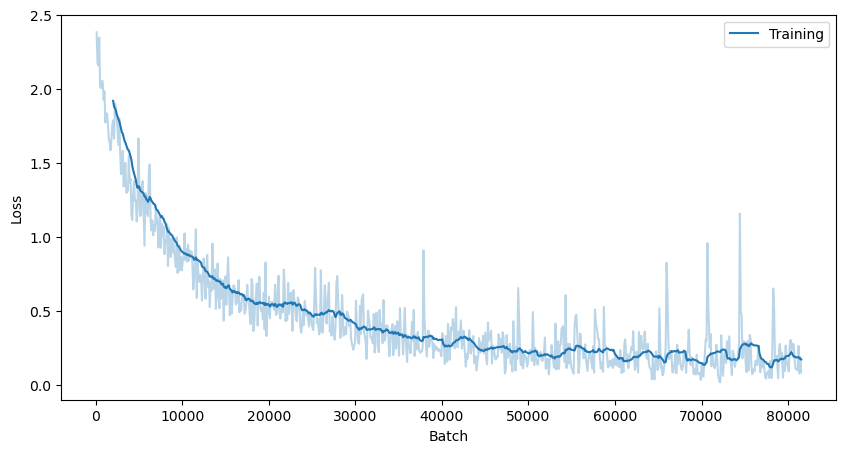

In [70]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

# create figure
fig = plt.figure(figsize=(10, 5))
plt.plot(batch, loss, alpha=0.3, color="tab:blue")
plt.plot(batch[19:], moving_average(loss, 20), color="tab:blue", label="Training")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.legend()
plt.show()


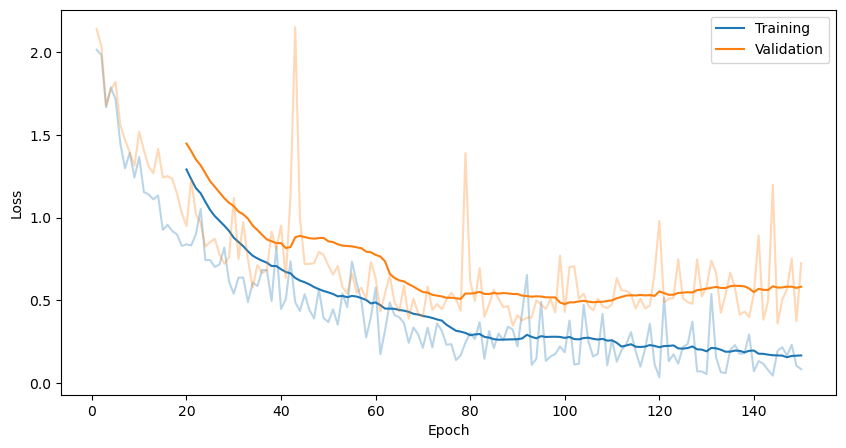

In [68]:
loss_val_19072023_163205 = np.genfromtxt("WISTAR_19072023-163205_Training vs Validation Loss_Validation.csv", delimiter=",")
loss_val_22082023_124009 = np.genfromtxt("WISTAR_22082023-124009_Training vs Validation Loss_Validation.csv", delimiter=",")
loss_val_22082023_130721 = np.genfromtxt("WISTAR_22082023-130721_Training vs Validation Loss_Validation.csv", delimiter=",")

loss_train_19072023_163205 = np.genfromtxt("WISTAR_19072023-163205_Training vs Validation Loss_Training.csv", delimiter=",")
loss_train_22082023_124009 = np.genfromtxt("WISTAR_22082023-124009_Training vs Validation Loss_Training.csv", delimiter=",")
loss_train_22082023_130721 = np.genfromtxt("WISTAR_22082023-130721_Training vs Validation Loss_Training.csv", delimiter=",")

# concatenate epoch arrays (second column)
epoch_val = np.concatenate((loss_val_19072023_163205[:, 1], loss_val_22082023_124009[:, 1] + loss_val_19072023_163205[-1, 1]))
epoch_val = np.concatenate((epoch_val, loss_val_22082023_130721[:, 1] + loss_val_19072023_163205[-1, 1] + loss_val_22082023_124009[-1, 1]))

epoch_train = np.concatenate((loss_train_19072023_163205[:, 1], loss_train_22082023_124009[:, 1] + loss_train_19072023_163205[-1, 1]))
epoch_train = np.concatenate((epoch_train, loss_train_22082023_130721[:, 1] + loss_train_19072023_163205[-1, 1] + loss_train_22082023_124009[-1, 1]))

# concatenate loss arrays (third column)
loss_val = np.concatenate((loss_val_19072023_163205[:, 2], loss_val_22082023_124009[:, 2], loss_val_22082023_130721[:, 2]))
loss_train = np.concatenate((loss_train_19072023_163205[:, 2], loss_train_22082023_124009[:, 2], loss_train_22082023_130721[:, 2]))

# reomve nan values
loss_val = loss_val[~np.isnan(loss_val)]
epoch_val = epoch_val[~np.isnan(epoch_val)]
loss_train = loss_train[~np.isnan(loss_train)]
epoch_train = epoch_train[~np.isnan(epoch_train)]

# create figure
fig = plt.figure(figsize=(10, 5))
plt.plot(epoch_train, loss_train, alpha=0.3, color="tab:blue")
plt.plot(epoch_train[19:], moving_average(loss_train, 20), color="tab:blue", label="Training")
plt.plot(epoch_val, loss_val, alpha=0.3, color="tab:orange")
plt.plot(epoch_val[19:], moving_average(loss_val, 20), color="tab:orange", label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.show()
